# Load the dataset

In [1]:
import pandas as pd

df = pd.read_csv("data/pima-indians-diabetes.csv")

# Split the dataset into features (X) and labels (y)

In [2]:
dataset = df.values

X = dataset[:,0:8]
y = dataset[:,8]

# Split the dataset into training and testing sets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


# Standardize the features

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu', kernel_regularizer='l1'))
model.add(Dropout(0.1))
model.add(Dense(units=16, activation='relu', kernel_regularizer='l1'))
model.add(Dense(units=8, activation='relu', kernel_regularizer='l1'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [6]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping callback

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Fit the model

In [8]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.1, callbacks=[early_stopping]).history

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5645 - loss: 1.8454 - val_accuracy: 0.5323 - val_loss: 1.7648
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6597 - loss: 1.6985 - val_accuracy: 0.5484 - val_loss: 1.6364
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6530 - loss: 1.5600 - val_accuracy: 0.5645 - val_loss: 1.4993
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6439 - loss: 1.4133 - val_accuracy: 0.5968 - val_loss: 1.3714
Epoch 5/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6693 - loss: 1.2827 - val_accuracy: 0.6129 - val_loss: 1.2562
Epoch 6/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7039 - loss: 1.1802 - val_accuracy: 0.6613 - val_loss: 1.1566
Epoch 7/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7393 - loss: 1.0783 - val_accuracy: 0.7258 - val_loss: 1.0712
Epoch 8/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7516 - loss: 1.0042 - val_accuracy: 0.

# Evaluate the model

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7185 - loss: 0.5916 
Test loss: 0.5901
Test accuracy: 0.7532


# Plot training and validation performance over epochs

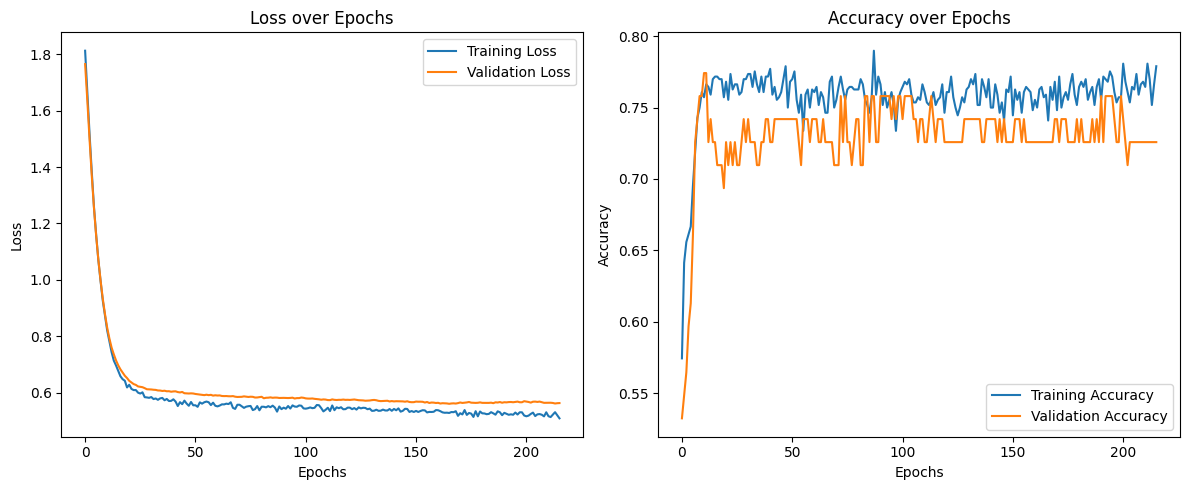

In [10]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history['loss'], label='Training Loss')
ax1.plot(history['val_loss'], label='Validation Loss')
ax1.set_title('Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history['accuracy'], label='Training Accuracy')
ax2.plot(history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()